In [1]:
#1
import librosa

y, sr = librosa.load('img/작은별.mp3')
dur = librosa.get_duration(y=y,sr=sr)

print(sr) #샘플링 레이트
print(dur) #지속 시간

22050
31.744807256235827


Text(0.5, 1.0, 'star')

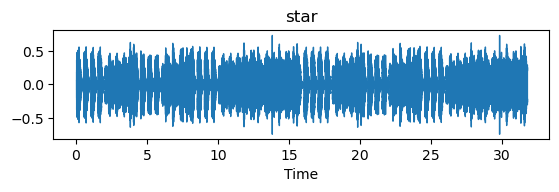

In [2]:
#2
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(y,sr=sr)
plt.title('star')

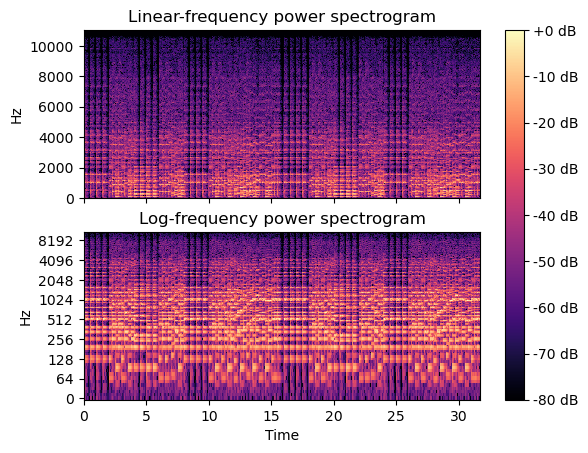

In [3]:
#3
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
# 단시간에 푸리에 변환 -> 절댓값 변환 -> DB(데시벨) 단위로 변환 -> 스케일리중 참조값은 최대값으로 하겠다
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

#d값을 선형 주파수로 서브플랏으로 표시하곘다
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024 #푸리에 연산시 오프 길이를 재지정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),ref=np.max)

#로그 주파수 스케일로 확인하곘다
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")


Text(0.5, 1.0, 'mel')

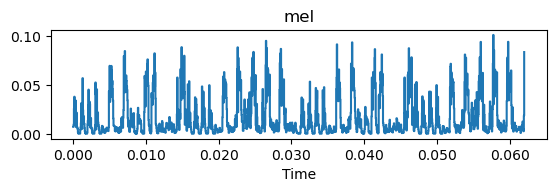

In [4]:
#4
mel = librosa.feature.melspectrogram(y=y, sr=sr)

s_db = librosa.power_to_db(mel)

plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(mel,sr=sr)
plt.title('mel')

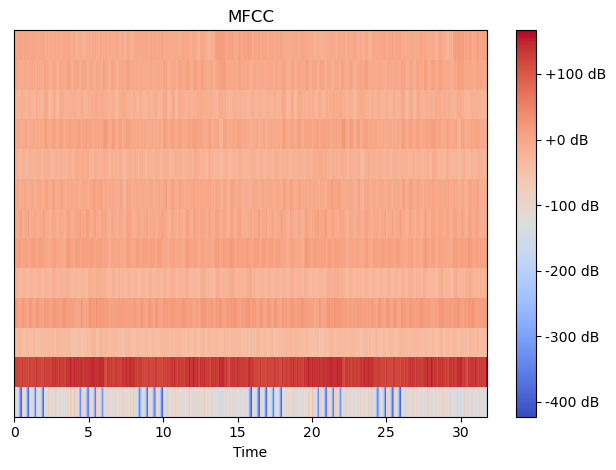

In [5]:
#5
mfccs = librosa.feature.mfcc(y=y, sr=sr , n_mfcc=13)
#hop_length = 1024 : MFCC 벡터의 샘플 수
# htk=True : htk 소프트웨어와 호환되는 방식으로 MFCC를 계산할지 유무

plt.figure()
#plt.subplot(3,1,1)
librosa.display.specshow(mfccs,x_axis='time',sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [6]:
#6
tempo,beat_times = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo : {:.2f} beats per minute'.format(tempo))

#추출된 비트 프레임을 시간(초)로 변환 -> 음악 분석 작업
beat_times = librosa.frames_to_time(beat_times,sr=sr)
print(beat_times)

Estimated tempo : 117.45 beats per minute
[ 0.06965986  0.53405896  1.04489796  1.53251701  2.04335601  2.55419501
  3.06503401  3.55265306  4.06349206  4.55111111  5.03873016  5.54956916
  6.03718821  6.54802721  7.05886621  7.56970522  8.05732426  8.54494331
  9.03256236  9.54340136 10.05424036 10.56507937 11.07591837 11.56353741
 12.07437642 12.56199546 13.07283447 13.56045351 14.04807256 14.55891156
 15.04653061 15.55736961 16.04498866 16.53260771 17.04344671 17.53106576
 18.04190476 18.55274376 19.06358277 19.57442177 20.06204082 20.54965986
 21.03727891 21.54811791 22.05895692 22.56979592 23.05741497 23.56825397
 24.05587302 24.54349206 25.03111111 25.54195011]


Text(0.5, 1.0, 'harmonic')

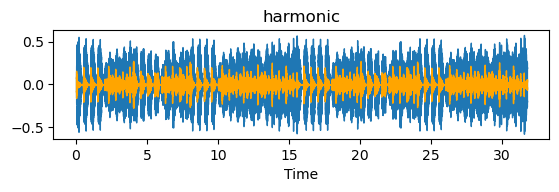

In [7]:
#7
harmonic , percussive = librosa.effects.hpss(y) #양자화 분리 작업 -> 음성인식

plt.figure()
plt.subplot(3,1,1)
librosa.display.waveshow(harmonic,sr=sr)
librosa.display.waveshow(percussive,sr=sr,color='orange')
plt.title('harmonic')

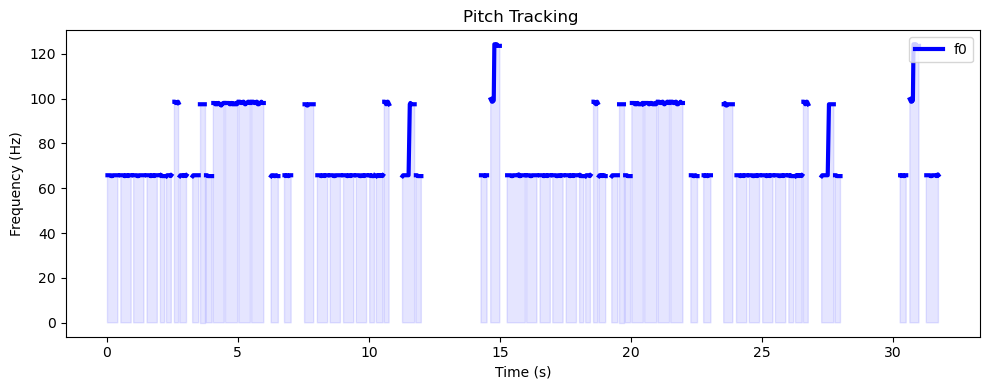

In [8]:
#8
import librosa
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load('img/작은별.mp3')

# 음정 추적
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

times = librosa.times_like(f0)
plt.figure(figsize=(10, 4))
plt.plot(times, f0, label='f0', color='blue', linewidth=3)
plt.fill_between(times, f0, where=voiced_flag, color='blue', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Pitch Tracking ')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

In [9]:
#9
import IPython


IPython.display.Audio(data=y_third,rate=sr)

NameError: name 'y_third' is not defined

In [10]:
#10
y_fast = librosa.effects.time_stretch(y, rate=2.0)

IPython.display.Audio(data=y_fast,rate=sr)

In [11]:
#11
#pip install -U --pre tensorflow tensorflow_datasets
#pt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [12]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

DATASET_PATH = 'data/mini_speech_commands'

data_dir = pathlib.Path(DATASET_PATH)
if not data_dir.exists():
  tf.keras.utils.get_file(
      'mini_speech_commands.zip',
      origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
      extract=True,
      cache_dir='.', cache_subdir='data')

In [13]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [14]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.

label names: ['down' 'go' 'left' 'no' 'right' 'stop' 'up' 'yes']


In [15]:
train_ds.element_spec

(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [16]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

In [17]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [18]:
for example_audio, example_labels in train_ds.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


In [19]:
label_names[[1,1,3,0]]

array(['go', 'go', 'no', 'down'], dtype='<U5')

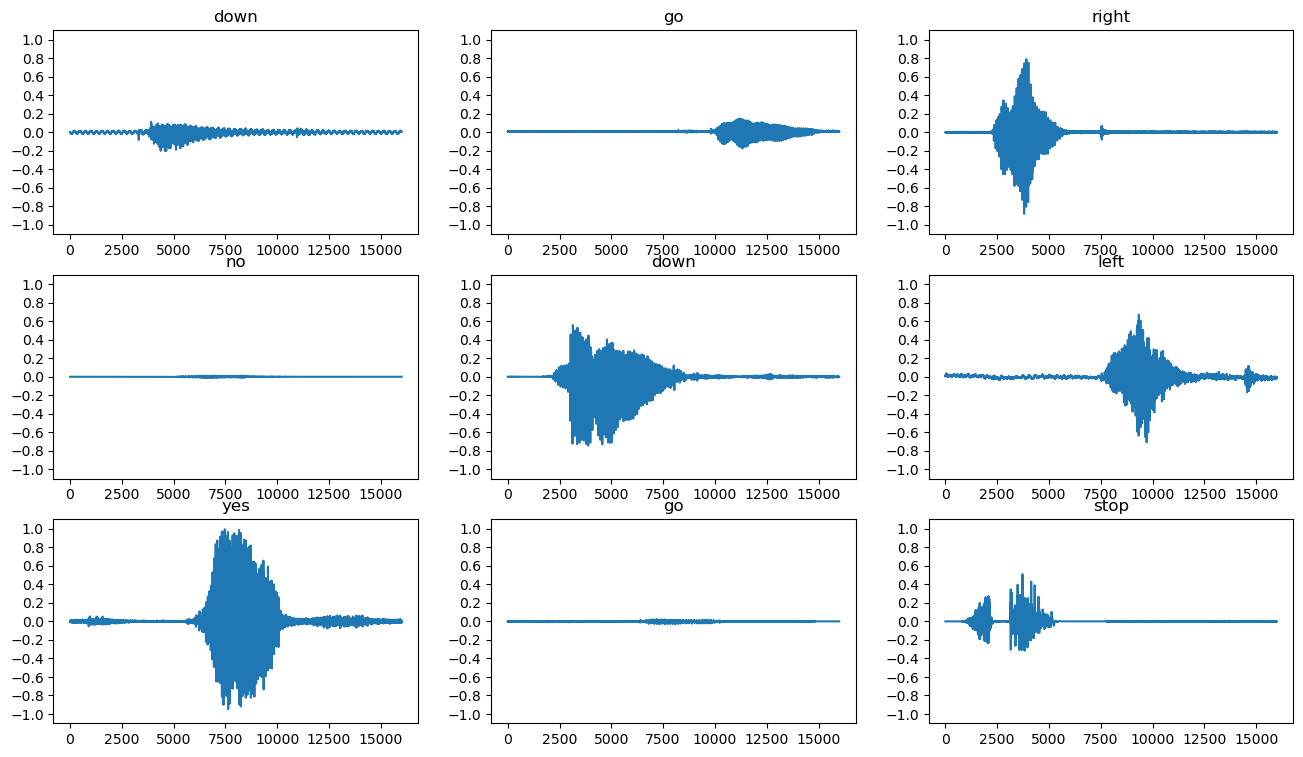

In [20]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
  if i>=n:
    break
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(example_audio[i].numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label_names[example_labels[i]]
  ax.set_title(label)
  ax.set_ylim([-1.1,1.1])

plt.show()

In [21]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [22]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: down
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: go
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: right
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [23]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

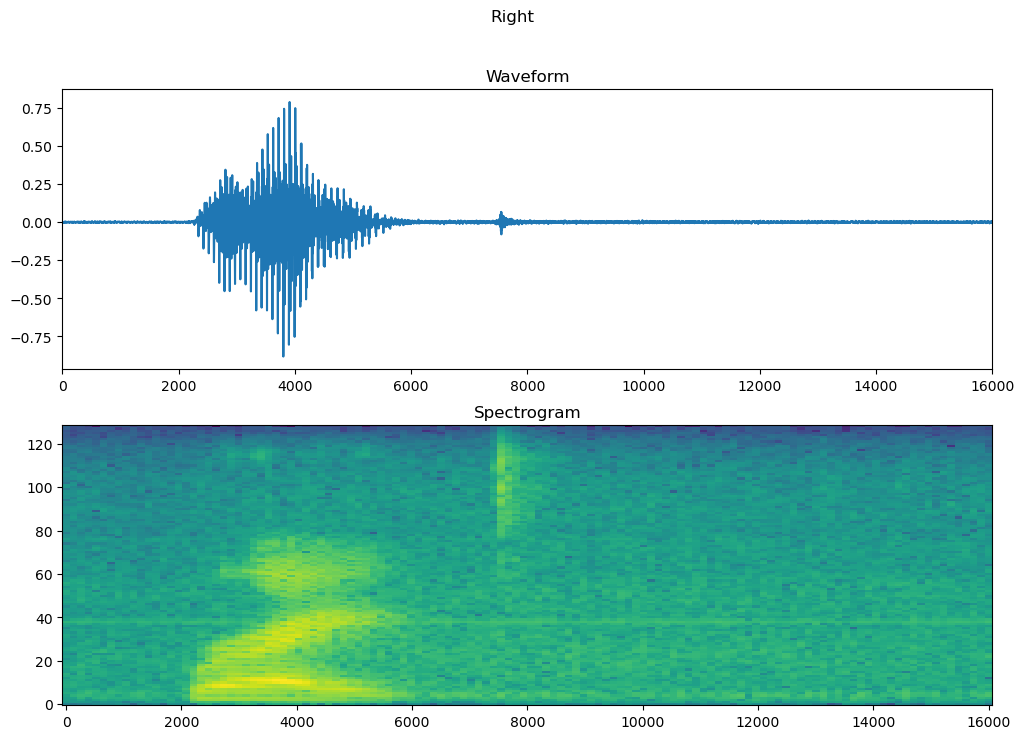

In [24]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [25]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [26]:
train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

In [27]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

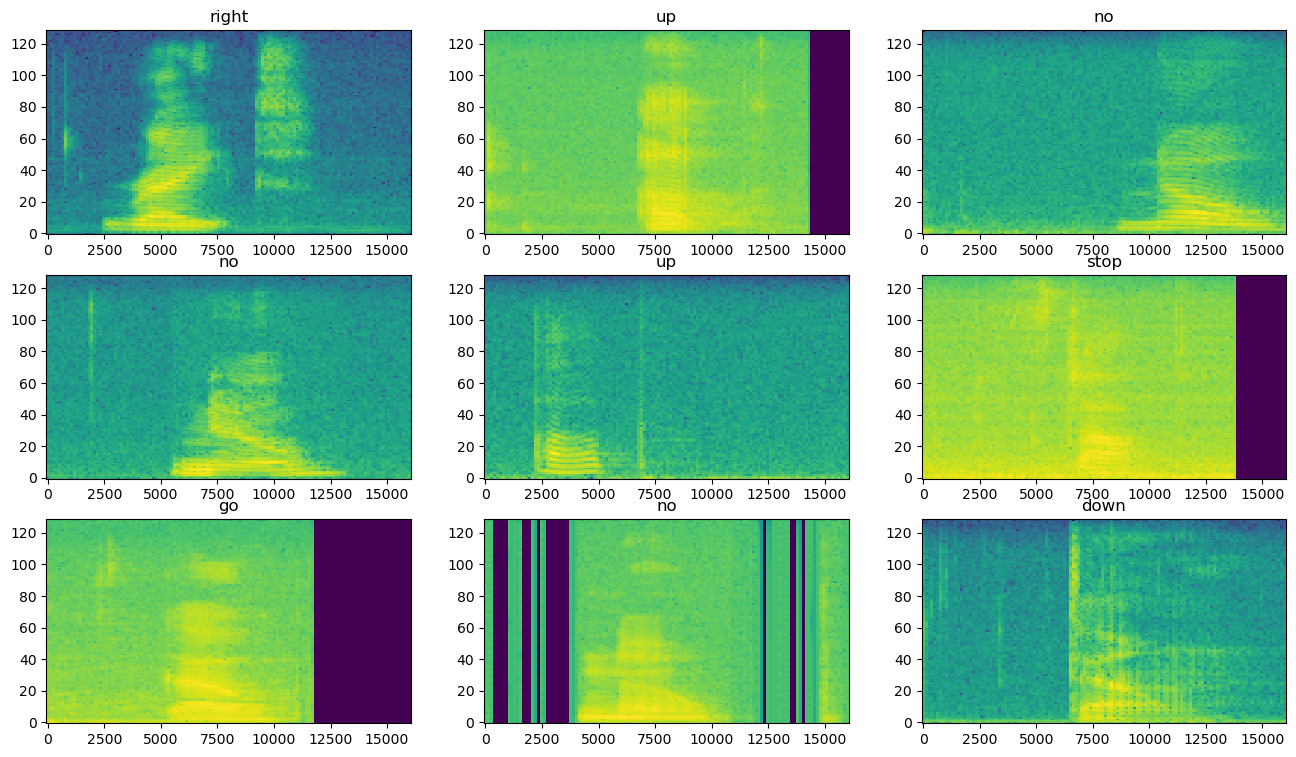

In [28]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(commands[example_spect_labels[i].numpy()])

plt.show()